In [7]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys
import matplotlib.pyplot as plt


from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from blackjack import BlackjackEnv
import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    V = defaultdict(float)

    for _ in range(num_episodes):
        episode = []
        state = env.reset()
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        G = 0
        for t in range(len(episode) - 1, -1, -1):
            state, action, reward = episode[t]
            G = discount_factor * G + reward
            if (state, action) not in episode[:t]:
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1
                V[state] = returns_sum[(state, action)] / returns_count[(state, action)]

    return V


In [4]:
def sample_policy(observation):
    score, _, _ = observation
    return 0 if score >= 20 else 1


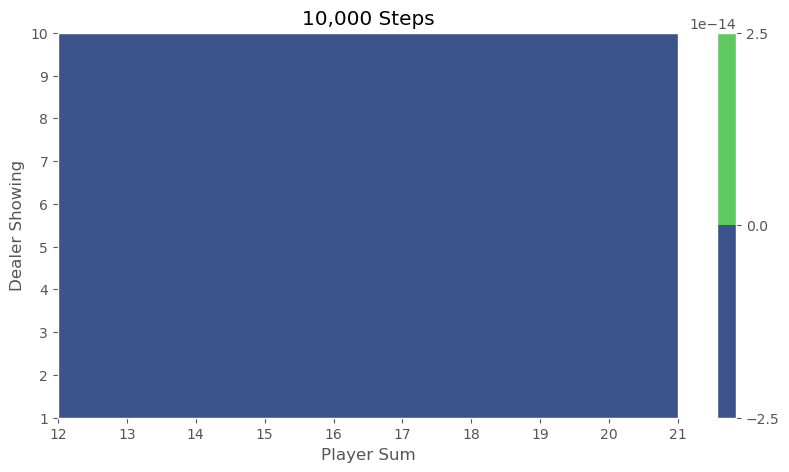

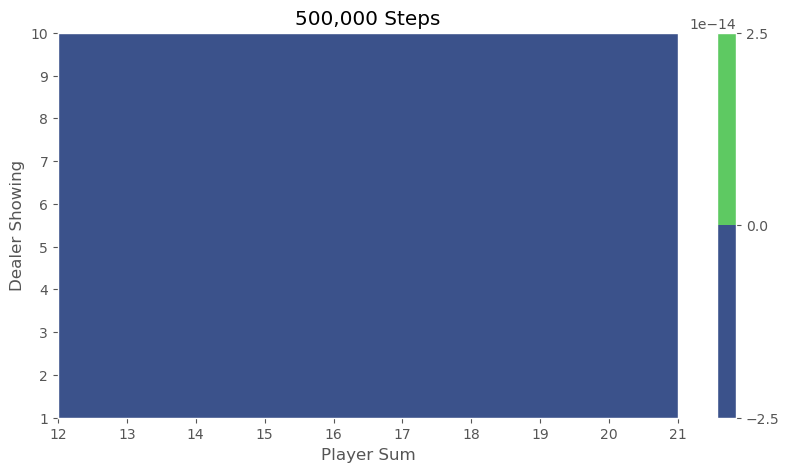

In [8]:
# Calculate the value function after 10,000 episodes
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)

# Calculate the value function after 500,000 episodes
V_500k = mc_prediction(sample_policy, env, num_episodes=500000)

# Plot the value functions
def plot_value_function(V, title):
    min_x = min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[V[(x, y)] for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    plt.figure(figsize=(10, 5))
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.xlabel('Player Sum')
    plt.ylabel('Dealer Showing')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plot the value function after 10,000 episodes
plot_value_function(V_10k, title="10,000 Steps")

# Plot the value function after 500,000 episodes
plot_value_function(V_500k, title="500,000 Steps")